# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.   

## Изучение данных из файла

Описание данных:  
***airports_nearest*** — расстояние до ближайшего аэропорта в метрах (м)  
***balcony*** — число балконов  
***ceiling_height*** — высота потолков (м)  
***cityCenters_nearest*** — расстояние до центра города (м)  
***days_exposition*** — сколько дней было размещено объявление (от публикации до снятия)  
***first_day_exposition*** — дата публикации  
***floor*** — этаж  
***floors_total*** — всего этажей в доме  
***is_apartment*** — апартаменты (булев тип)  
***kitchen_area*** — площадь кухни в квадратных метрах (м²)  
***last_price*** — цена на момент снятия с публикации  
***living_area*** — жилая площадь в квадратных метрах (м²)  
***locality_name*** — название населённого пункта  
***open_plan*** — свободная планировка (булев тип)  
***parks_around3000*** — число парков в радиусе 3 км  
***parks_nearest*** — расстояние до ближайшего парка (м)  
***ponds_around3000*** — число водоёмов в радиусе 3 км  
***ponds_nearest*** — расстояние до ближайшего водоёма (м)  
***rooms*** — число комнат  
***studio*** — квартира-студия (булев тип)  
***total_area*** — площадь квартиры в квадратных метрах (м²)  
***total_images*** — число фотографий квартиры в объявлении

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Для того, чтобы картина с пропусками стала яснее, выведем процент пропусков в каждом столбце в порядке убывания:

In [ ]:
df.isna().mean().sort_values(ascending = False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
ponds_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
first_day_exposition    0.000000
last_price              0.000000
total_area              0.000000
studio                  0.000000
rooms                   0.000000
floor                   0.000000
open_plan               0.000000
total_images            0.000000
dtype: float64

Изучим названия столбцов датафрейма:

In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Несколько названий столбцов стоит заменить:  
* ***cityCenters_nearest***  ---  ***city_сenters_nearest***
* ***parks_around3000***  ---  ***parks_around_3000***
* ***ponds_around3000***  ---  ***ponds_around_3000***

### Вывод

В выводах отражены наблюдения и предложения по дальнейшей работе с каждым из столбцов таблицы:  
  
Столбцы, в которых есть пропуски (в порядке процента пропусков в столбце):

* ***is_apartment***: В этом столбце наибольшее количество пропусков в данных (около 88%), но как мне кажется, это легко исправимо: скорее всего, незаполненные значения в этом столбце указывают на то, что данная квартира не является апартаментами, следует просто заменить NaN на False.
* ***parks_nearest***: В этом столбце около 66% пропусков, что является очень большим показателем, предполагаю, что NaN-ы в этом столбце связаны с тем, что рядом с недвижимостью попросту нет парков, и как следствие, расстояние до них не указывалось, следует проверить это гипотезу.
* ***ponds_nearest***: Предположение аналогично пропускам в столбце ***parks_nearest***, будет проверяться.
* ***balcony***: В этом столбце около 48% пропусков, я думаю, что пропуски связаны с тем, что балкона просто нет, и при заполнении данных просто не написали 0, а оставили незаполненную ячейку.
* ***ceiling_height***: В этом столбце около 38% пропусков, следует изучить данные в этом столбце подробнее, чтобы корректно заполнить высоту потолков, так как в данных есть выбросы (высота потолка 100 метров).
* ***airports_nearest***: Могу предположить, что пропуски в данном столбце (около 23%) связаны с отсутствием аэропорта рядом.
* ***cityCenters_nearest***: В этом столбце около 23% пропусков, следует изучить данные в этом столбце подробнее, чтобы корректно заполнить расстояние до центра города.
* ***parks_around3000*** и ***ponds_around3000***: В этих столбцах одинаковый процент пропусков с точностью до 6 знака после запятой, скорее всего пропуски в одних и тех же строках, нужно это проверить и корректно заполнить значения.
* ***days_exposition***: В этом столбце около 13% пропусков, что является значимым процентом для нашей задачи, так как вопросы, поставленные в исследовании, напрямую зависят от данных значений, нужно выяснить причину и заполнить пропуски.
* ***kitchen_area***: 10% пропусков в данном столбце, следует изучить данные в этом столбце подробнее, чтобы корректно заполнить площадь кухни.
* ***living_area***: Ситуация такая же как и в столбце ***kitchen_area***, думаю нужно найти корреляцию данных значений со значениями общей площади квартиры и заполнить пропуски или вовсе избавиться от строк с пропусками в данных столбцах, чтобы получить более точную автоматизированную систему в будущем.
* ***floors_total***: Около 4% пропусков, нужно детальнее изучить данные, возможно стоит удалить данные строки.
* ***locality_name***: 2% пропусков, ситуация похожая на столбец ***floors_total***, скорее всего данные под удаление, так как процент пропусков низкий.

Столбцы, в которых нет пропусков:

* ***first_day_exposition***: следует привести данные к типу *datetime64*
* ***last_price***: Данные с этом столбце приведены в рублях, думаю корректнее привети значения в миллионах, с точностью до 3 знаков после запятой, проще для восприятия.
* ***total_area***: минимальная площадь квартры в 12 м2 смущает, так же как и квартира площадью 900 м2, стоит детальнее изучить данный столбец.
* ***studio***: На первый взгляд к данные в столбце корректны. 
* ***rooms***: На первый взгляд к данные в столбце корректны. Скорее всего 19 комнат в квартире площадь 900 м2.
* ***floor***: На первый взгляд к данные в столбце корректны.
* ***open_plan***: На первый взгляд к данные в столбце корректны.
* ***total_images***: На первый взгляд к данные в столбце корректны.

## Предобработка данных

### Изменим названия столбцов:

In [ ]:
df = df.rename(columns={'cityCenters_nearest': 'city_сenters_nearest',
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000'})

Проверим данные:

In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Начнем заполнять пропуски в данных в порядке уменьшения пропусков в столбце:

#### Столбец ***is_apartment***:

Выведем количество пропусков, информацию о столбце и строки датафрейма с пропусками, для более детального анализа данных:

In [ ]:
df['is_apartment'].isna().sum()

20924

Заменим пропуски в данных значением False, скорее всего пропуски означают то, что данная недвижимость не является апартаментами.

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Проверим количество пропусков

In [ ]:
df['is_apartment'].isna().sum()

0

#### Столбец ***parks_nearest***:

Выведем количество пропусков, информацию о столбце и строки датафрейма с пропусками, для более детального анализа данных:

In [ ]:
df['parks_nearest'].isna().sum()

15620

In [ ]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [ ]:
df[df['parks_nearest'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.5,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,NaN,6.0,17.00,1,False,...,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
17,6,4180000.0,36.00,2016-09-09T00:00:00,1,NaN,17.0,16.50,7,False,...,11.00,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0


Можно заметить, что в случае, если значение в столбце ***parks_around_3000*** равно нулю, отсутствует значение и в столбце ***parks_nearest*** следовательно если парков в радиусе 3км от недвижимости нет, эти значения могли не заполнить.  
Заполним пропущенные значения ***parks_nearest*** на -1, в случае, если значение в столбце ***parks_around_3000*** равно нулю.
Также можно заметить пропуски в столбце ***parks_around_3000***, предположу что пропуски в данном столбце означают то, что парков нет.

In [ ]:
df['parks_around_3000'].isna().sum()

5518

In [ ]:
df.loc[df['parks_around_3000'].isna(), 'parks_around_3000'] = 0

Проверим количество пропусков:

In [ ]:
df['parks_around_3000'].isna().sum()

0

Заменим значения в столбце ***parks_nearest***:

In [ ]:
df.loc[df['parks_around_3000'] == 0, 'parks_nearest'] = -1

Проверим количество пропусков:

In [ ]:
df['parks_nearest'].isna().sum()

0

#### Столбец ***ponds_nearest***: 

Заполняем пропуски аналогично пропускам в столбце ***parks_nearest***:

In [ ]:
df['ponds_nearest'].isna().sum()

14589

In [ ]:
df['ponds_around_3000'].isna().sum()

5518

In [ ]:
df.loc[df['ponds_around_3000'].isna(), 'ponds_around_3000'] = 0

In [ ]:
df.loc[df['ponds_around_3000'] == 0, 'ponds_nearest'] = -1

Проверим количество пропусков:

In [ ]:
df['ponds_nearest'].isna().sum()

0

In [ ]:
df['ponds_around_3000'].isna().sum()

0

#### Столбец ***balcony***:

Выведем количество пропусков, информацию о столбце и строки датафрейма с пропусками, для более детального анализа данных:

In [ ]:
df['balcony'].isna().sum()

11519

Заменим пропуски в данном столбце на 0:

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

Проверим количество пропусков:

In [ ]:
df['balcony'].isna().sum()

0

#### Столбец ***ceiling_height***:

Выведем количество пропусков, информацию о столбце и строки датафрейма с пропусками, для более детального анализа данных:

In [ ]:
df['ceiling_height'].isna().sum()

9195

In [ ]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Обработаем пропуски в данном столбце:  
Заменим пропуски в данном столбце медианным значением высоты потолков, для этого найдем медиану высоты потолков для Питера и для области.

In [ ]:
print(df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median())
print(df.query('locality_name != "Санкт-Петербург"')['ceiling_height'].median())

2.7
2.6


Заполним пропуски медианными значениями:

In [ ]:
df.loc[(df['locality_name'] == "Санкт-Петербург") & (df['ceiling_height'].isna()), 'ceiling_height'] = 2.7
df.loc[(df['locality_name'] != "Санкт-Петербург") & (df['ceiling_height'].isna()), 'ceiling_height'] = 2.6

Проверим количество пропусков:

In [ ]:
df['ceiling_height'].isna().sum()

0

#### Столбец ***airports_nearest***:

Выведем количество пропусков, информацию о столбце и строки датафрейма с пропусками, для более детального анализа данных:

In [ ]:
df['airports_nearest'].isna().sum()

5542

In [ ]:
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Заменим пропуски в данном столбце на -1, это будет значить, что аэропорта ближе чем 85км от недвижимости нет:

In [ ]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1)

Проверка:

In [ ]:
df['airports_nearest'].isna().sum()

0

#### Столбец ***city_сenters_nearest***:

Выведем количество пропусков, информацию о столбце и строки датафрейма с пропусками, для более детального анализа данных:

In [ ]:
df['city_сenters_nearest'].isna().sum()

5519

In [ ]:
df['city_сenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

In [ ]:
df[df['city_сenters_nearest'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,-1.0,NaN,0.0,-1.0,0.0,-1.0,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,-1.0,NaN,0.0,-1.0,0.0,-1.0,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,...,9.00,0.0,Сертолово,-1.0,NaN,0.0,-1.0,0.0,-1.0,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,-1.0,NaN,0.0,-1.0,0.0,-1.0,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.60,9.0,NaN,2,False,...,NaN,0.0,Коммунар,-1.0,NaN,0.0,-1.0,0.0,-1.0,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,0.0,поселок городского типа Красный Бор,-1.0,NaN,0.0,-1.0,0.0,-1.0,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,False,...,11.60,0.0,посёлок Мурино,-1.0,NaN,0.0,-1.0,0.0,-1.0,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.60,4.0,42.50,3,False,...,5.70,1.0,Гатчина,-1.0,NaN,0.0,-1.0,0.0,-1.0,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.60,12.0,NaN,8,False,...,NaN,0.0,посёлок Мурино,-1.0,NaN,0.0,-1.0,0.0,-1.0,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,False,...,11.90,2.0,Сертолово,-1.0,NaN,0.0,-1.0,0.0,-1.0,5.0


Из отфильтрованной таблицы видно, что пропуски в данном столбце есть и в СПБ и за его пределами, так что корректно заполнить эти значения не представляется возможным, также в дальнейших расчетах пропуски в данном столбце не вызовут ошибок, а если убрать строки с пропусками, мы потеряем значительную часть датафрейма, так что оставляем пропуски в данном столбце как есть.

#### Столбец ***days_exposition***:

Пропуски в данном столбце могут означать то, что на момент выгрузки данных из базы объявление всё ещё не было снято.

In [ ]:
df['days_exposition'].isna().sum()

3181

Корректно заполнить данные пропуски не представляется возможным, так что оставим данные как есть.

#### Столбцы ***kitchen_area*** и ***living_area***:

Для того, чтобы заполнить пропуски в данных столбцах нужно определить, от каких данных в каком столбце наиболее зависят площадь кухни и жилая площадь соответсвенно.

Для этого выведем матрицу корреляции:


In [ ]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,0.005273,0.010427,0.104780,0.031340,0.010532,-0.029303,-0.024407,0.104756,0.048903,0.039938,-0.047666,0.037085,0.028101,0.011323,0.010248,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.067946,-0.006984,0.566492,0.026576,0.026958,-0.025362,-0.008802,0.519869,0.008559,0.108025,-0.206747,0.197840,0.117854,0.208621,0.089844,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.083456,-0.075774,0.939537,-0.024754,0.029633,-0.072653,-0.034885,0.609121,0.009941,0.091266,-0.231446,0.200211,0.119481,0.200294,0.087664,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.049900,-0.228215,0.845977,-0.150862,0.000399,-0.147286,-0.087500,0.269945,-0.015519,0.047544,-0.184864,0.157495,0.081873,0.121276,0.058521,0.126961
ceiling_height,0.005273,0.067946,0.083456,0.049900,1.000000,-0.023643,0.080743,-0.010619,0.146606,-0.000238,0.017447,0.073855,0.032073,0.015550,-0.084505,0.059754,0.032175,0.065857,0.016200,0.018657
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.023643,1.000000,-0.169311,0.678059,-0.026351,0.070151,0.050791,0.163944,0.172812,0.163578,0.019774,-0.158775,-0.062783,-0.048698,0.017249,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.080743,-0.169311,1.000000,-0.097210,0.026969,-0.056231,-0.033711,0.428674,-0.014772,0.062352,-0.231368,0.212357,0.109797,0.182439,0.083666,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.010619,0.678059,-0.097210,1.000000,-0.013294,0.036940,0.035824,0.135531,0.168567,0.109165,0.009084,-0.105212,-0.039393,-0.029710,0.013690,-0.039463
is_apartment,0.010532,0.026958,0.029633,0.000399,0.146606,-0.026351,0.026969,-0.013294,1.000000,-0.003657,-0.002448,0.049034,0.033022,0.014352,0.003732,0.021559,-0.010527,0.024400,0.018300,0.015262
studio,-0.029303,-0.025362,-0.072653,-0.147286,-0.000238,0.070151,-0.056231,0.036940,-0.003657,1.000000,-0.004235,NaN,0.028899,-0.032253,-0.007029,-0.032014,-0.023284,-0.009690,-0.004831,-0.022476


***living_area***	больше всего зависит от ***total_area***  
***kitchen_area*** больше всего зависит от ***total_area*** 

##### Проведем необходимые расчеты:  
Для этого создадим новую таблицу для расчетов

In [ ]:
df_1 = df.loc[:, ['total_area', 'living_area', 'kitchen_area']]

In [ ]:
df_1.head()

,total_area,living_area,kitchen_area
0,108.0,51.0,25.0
1,40.4,18.6,11.0
2,56.0,34.3,8.3
3,159.0,NaN,NaN
4,100.0,32.0,41.0


Необходимо удалить все строки с пропусками для корректных расчетов

In [ ]:
df_1 = df_1.dropna().reset_index(drop = True)

Довавим 2 столбца к этой таблице: отношение площадей кухни и жилой к общей площади

In [ ]:
df_1['living_ratio'] = df_1['living_area'] / df_1['total_area']
df_1['kitchen_ratio'] = df_1['kitchen_area'] / df_1['total_area']

In [ ]:
df_1.head(10)

,total_area,living_area,kitchen_area,living_ratio,kitchen_ratio
0,108.00,51.00,25.00,0.472222,0.231481
1,40.40,18.60,11.00,0.460396,0.272277
2,56.00,34.30,8.30,0.612500,0.148214
3,100.00,32.00,41.00,0.320000,0.410000
4,30.40,14.40,9.10,0.473684,0.299342
5,37.30,10.60,14.40,0.284182,0.386059
6,33.16,15.43,8.81,0.465320,0.265682
7,61.00,43.60,6.50,0.714754,0.106557
8,39.60,20.30,8.50,0.512626,0.214646
9,44.00,31.00,6.00,0.704545,0.136364


Tеперь найдем среднее значение отношения площадей кухни и жилой к общей площади во всей таблице

In [ ]:
living_ratio = df_1['living_ratio'].mean()
kitchen_ratio = df_1['kitchen_ratio'].mean()

In [ ]:
print(living_ratio)
print(kitchen_ratio)

0.5625277638425964
0.18696654991919356


Заполним пропуски:

In [ ]:
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] * living_ratio
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area'] * kitchen_ratio

Проверка:

In [ ]:
print(df['living_area'].isna().sum())
print(df['kitchen_area'].isna().sum())

0
0


#### Столбец ***floors_total***:

In [ ]:
df['floors_total'].isna().sum()

86

In [ ]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [ ]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.7,NaN,30.800000,4,False,...,12.000000,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,-1.0,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.7,NaN,20.750000,1,False,...,5.253760,0.0,Санкт-Петербург,22041.0,17369.0,0.0,-1.0,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.400000,12,False,...,10.630000,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.7,NaN,47.100000,8,False,...,16.800000,0.0,Санкт-Петербург,22041.0,17369.0,0.0,-1.0,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.7,NaN,21.938583,9,False,...,7.291695,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,35.720513,3,False,...,11.872376,0.0,Санкт-Петербург,51340.0,15363.0,0.0,-1.0,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.7,NaN,31.700000,20,False,...,14.400000,0.0,Санкт-Петербург,22041.0,17369.0,0.0,-1.0,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.7,NaN,45.380000,6,False,...,23.420000,0.0,Санкт-Петербург,19095.0,4529.0,0.0,-1.0,0.0,-1.0,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.7,NaN,50.400000,18,False,...,23.600000,0.0,Санкт-Петербург,19095.0,4529.0,0.0,-1.0,0.0,-1.0,104.0


Пропуски в данном столбце можно было заменить на значение в столбце floor, но так как мы будем добавлять столбец категоризации данных по этажу, то лучше их удалить.

In [ ]:
df = df.dropna(subset=['floors_total'])

In [ ]:
df['floors_total'].isna().sum()

0

#### Столбец ***locality_name***:

In [ ]:
df['locality_name'].isna().sum()

48

Пропуски в данном столбце можно заменить на значение 'Неизвестно'.   
Также не будем исправлять неявные дубликаты в данном столбце, хоть и при беглом ознакомлении с данными они были обнаружены

In [ ]:
df['locality_name'] = df['locality_name'].fillna('Неизвестно')

Проверка:

In [ ]:
df['locality_name'].isna().sum()

0

### Исправление типов данных:

#### Столбец ***first_day_exposition***:

Нужно привести данные в этом столбце к типу *datetime64*:

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим внесенные изменения:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null float64
locality_name           23613 non-null object
airports_nearest        23613 non-null float64
city_сenters_nearest    18104 non-null float64
parks_around_3000       23613 non-null float64
parks_nearest           23613 non-null float64
ponds_a

#### Столбец ***last_price***:

Данные приведем в миллионах и округлим до 3 знаков после запятой

In [ ]:
df['last_price'] = round(df['last_price'] / 10**6, 3)

In [ ]:
df['last_price'].describe()

count    23613.000000
mean         6.540556
std         10.901722
min          0.012000
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

Проверим внесенные изменения:

In [ ]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,40.40,2018-12-04,1,2.60,11.0,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,10,5.196,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.00,2015-07-24,3,2.70,14.0,89.441914,9,False,...,29.727681,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2.890,30.40,2018-09-10,1,2.60,12.0,14.400000,5,False,...,9.100000,0.0,городской посёлок Янино-1,-1.0,NaN,0.0,-1.0,0.0,-1.0,55.0
6,6,3.700,37.30,2017-11-02,1,2.60,26.0,10.600000,6,False,...,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0
7,5,7.915,71.60,2019-04-18,2,2.70,24.0,40.276988,22,False,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,-1.0,0.0,-1.0,NaN
8,20,2.900,33.16,2018-05-23,1,2.60,27.0,15.430000,26,False,...,8.810000,0.0,посёлок Мурино,-1.0,NaN,0.0,-1.0,0.0,-1.0,189.0
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,-1.0,0.0,-1.0,289.0


### Вывод

В датафрейме были заполнены пропуски в данных и исправлены типы данных там, где это было необходимо.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null float64
locality_name           23613 non-null object
airports_nearest        23613 non-null float64
city_сenters_nearest    18104 non-null float64
parks_around_3000       23613 non-null float64
parks_nearest           23613 non-null float64
ponds_a

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23613.0,9.874518,5.681541,0.000,6.00,9.00,14.000,50.0
last_price,23613.0,6.540556,10.901722,0.012,3.40,4.65,6.799,763.0
total_area,23613.0,60.340678,35.648988,12.000,40.00,52.00,69.800,900.0
rooms,23613.0,2.071147,1.078380,0.000,1.00,2.00,3.000,19.0
ceiling_height,23613.0,2.728799,0.990246,1.000,2.60,2.70,2.700,100.0
floors_total,23613.0,10.673824,6.597173,1.000,5.00,9.00,16.000,60.0
living_area,23613.0,34.559250,22.329887,2.000,19.00,30.00,42.100,409.7
floor,23613.0,5.877313,4.873539,1.000,2.00,4.00,8.000,33.0
kitchen_area,23613.0,10.566717,6.093895,1.300,7.00,9.00,12.000,112.0
balcony,23613.0,0.593063,0.960307,0.000,0.00,0.00,1.000,5.0


## Расчеты и добавление результатов в таблицу:

### Добавление необходимых строк в таблицу:

#### Добавим в таблицу столбец с ценой квадратного метра:

In [ ]:
df['m2_price'] = df['last_price'] / df['total_area']

In [ ]:
df['m2_price'].describe()

count    23613.000000
mean         0.099397
std          0.050358
min          0.000110
25%          0.076563
50%          0.095000
75%          0.114206
max          1.907500
Name: m2_price, dtype: float64

#### Добавим в таблицу столбцы с днем недели, месяцем и годом публикации объявления:

In [ ]:
df['weekday_of_publication'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month_of_publication'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_of_publication'] = pd.DatetimeIndex(df['first_day_exposition']).year

Проверим внесенные изменения:

In [ ]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,m2_price,weekday_of_publication,month_of_publication,year_of_publication
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,0.120370,3,3,2019
1,7,3.350,40.40,2018-12-04,1,2.60,11.0,18.600000,1,False,...,18603.0,0.0,-1.0,0.0,-1.0,81.0,0.082921,1,12,2018
2,10,5.196,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,0.092786,3,8,2015
3,0,64.900,159.00,2015-07-24,3,2.70,14.0,89.441914,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,0.408176,4,7,2015
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,0.100000,1,6,2018
5,10,2.890,30.40,2018-09-10,1,2.60,12.0,14.400000,5,False,...,NaN,0.0,-1.0,0.0,-1.0,55.0,0.095066,0,9,2018
6,6,3.700,37.30,2017-11-02,1,2.60,26.0,10.600000,6,False,...,19143.0,0.0,-1.0,0.0,-1.0,155.0,0.099196,3,11,2017
7,5,7.915,71.60,2019-04-18,2,2.70,24.0,40.276988,22,False,...,11634.0,0.0,-1.0,0.0,-1.0,NaN,0.110545,3,4,2019
8,20,2.900,33.16,2018-05-23,1,2.60,27.0,15.430000,26,False,...,NaN,0.0,-1.0,0.0,-1.0,189.0,0.087455,2,5,2018
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,15008.0,0.0,-1.0,0.0,-1.0,289.0,0.088525,6,2,2017


#### Добавим в таблицу столбец с этажом квартиры:

Напишем для этого функцию:

In [ ]:
def type_of_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
df['floor_type'] = df.apply(type_of_floor, axis=1)

Проверим внесенные изменения:

In [ ]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,m2_price,weekday_of_publication,month_of_publication,year_of_publication,floor_type
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,0.120370,3,3,2019,другой
1,7,3.350,40.40,2018-12-04,1,2.60,11.0,18.600000,1,False,...,0.0,-1.0,0.0,-1.0,81.0,0.082921,1,12,2018,первый
2,10,5.196,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,0.092786,3,8,2015,другой
3,0,64.900,159.00,2015-07-24,3,2.70,14.0,89.441914,9,False,...,2.0,84.0,3.0,234.0,424.0,0.408176,4,7,2015,другой
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,0.100000,1,6,2018,другой
5,10,2.890,30.40,2018-09-10,1,2.60,12.0,14.400000,5,False,...,0.0,-1.0,0.0,-1.0,55.0,0.095066,0,9,2018,другой
6,6,3.700,37.30,2017-11-02,1,2.60,26.0,10.600000,6,False,...,0.0,-1.0,0.0,-1.0,155.0,0.099196,3,11,2017,другой
7,5,7.915,71.60,2019-04-18,2,2.70,24.0,40.276988,22,False,...,0.0,-1.0,0.0,-1.0,NaN,0.110545,3,4,2019,другой
8,20,2.900,33.16,2018-05-23,1,2.60,27.0,15.430000,26,False,...,0.0,-1.0,0.0,-1.0,189.0,0.087455,2,5,2018,другой
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,0.0,-1.0,0.0,-1.0,289.0,0.088525,6,2,2017,другой


#### Добавим в таблицу столбцы с соотношением жилой и общей площади, а также отношением площади кухни к общей:

In [ ]:
df['living_ratio'] = df['living_area'] / df['total_area']
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']

Проверим внесенные изменения:

In [ ]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,m2_price,weekday_of_publication,month_of_publication,year_of_publication,floor_type,living_ratio,kitchen_ratio
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,0.120370,3,3,2019,другой,0.472222,0.231481
1,7,3.350,40.40,2018-12-04,1,2.60,11.0,18.600000,1,False,...,0.0,-1.0,81.0,0.082921,1,12,2018,первый,0.460396,0.272277
2,10,5.196,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,2.0,574.0,558.0,0.092786,3,8,2015,другой,0.612500,0.148214
3,0,64.900,159.00,2015-07-24,3,2.70,14.0,89.441914,9,False,...,3.0,234.0,424.0,0.408176,4,7,2015,другой,0.562528,0.186967
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,0.100000,1,6,2018,другой,0.320000,0.410000
5,10,2.890,30.40,2018-09-10,1,2.60,12.0,14.400000,5,False,...,0.0,-1.0,55.0,0.095066,0,9,2018,другой,0.473684,0.299342
6,6,3.700,37.30,2017-11-02,1,2.60,26.0,10.600000,6,False,...,0.0,-1.0,155.0,0.099196,3,11,2017,другой,0.284182,0.386059
7,5,7.915,71.60,2019-04-18,2,2.70,24.0,40.276988,22,False,...,0.0,-1.0,NaN,0.110545,3,4,2019,другой,0.562528,0.263966
8,20,2.900,33.16,2018-05-23,1,2.60,27.0,15.430000,26,False,...,0.0,-1.0,189.0,0.087455,2,5,2018,другой,0.465320,0.265682
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,0.0,-1.0,289.0,0.088525,6,2,2017,другой,0.714754,0.106557


### Вывод

В датафрейм были добавлены после необходимых расчетов:
* цена квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры
* соотношение жилой и общей площади, а также отношение площади кухни к общей

## Исследовательский анализ данных

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Для автоматизации изучения каждого параметра датафрейма создадим функцию *describe_and_hist*, которая будет выводить описание нужного параметра (.describe()), значения 10 и 90 процентлей и строить гистограмму для этого параметра.

In [ ]:
def describe_and_hist(df, column, title):
    display(df[column].describe())
    print('10й и 90й процентли:', df[column].quantile(0.1), ',', df[column].quantile(0.9))
    #Вычислим границы выбросов:
    # Первая квантиль
    Q1 = df[column].quantile(0.25)
    # Третья квантиль
    Q3 = df[column].quantile(0.75)
    # Межквантильное расстояние
    IQR = Q3 - Q1
    
    min_range = Q1 - 1.5 * IQR
    max_range = Q3 + 1.5 * IQR
    
    if min_range < 0:
        min_range = 0
    
    df[column].plot(kind='hist', bins=50, range=(min_range, max_range), grid=True, title=title, figsize=(13,6), legend=True)

#### Площадь:

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

10й и 90й процентли: 33.0 , 93.4


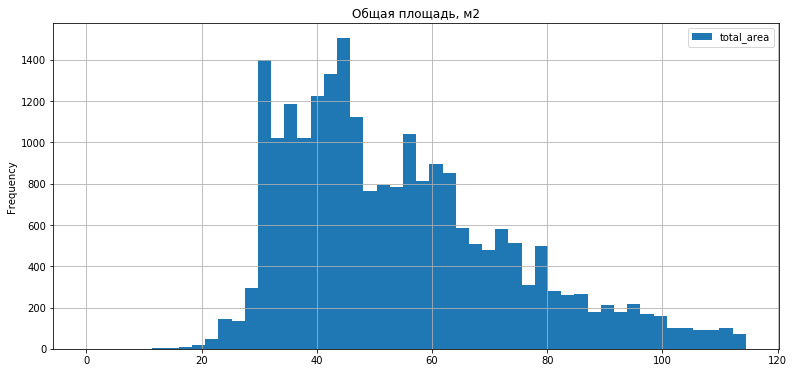

In [ ]:
describe_and_hist(df, 'total_area', 'Общая площадь, м2')

#### Стоимость:

count    23613.000000
mean         6.540556
std         10.901722
min          0.012000
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

10й и 90й процентли: 2.5 , 10.9


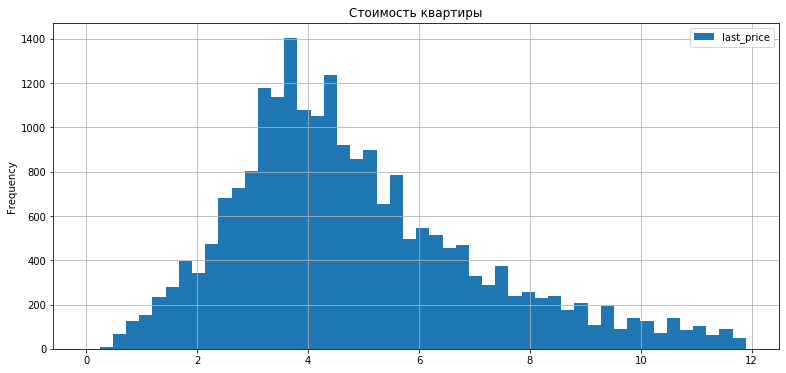

In [ ]:
describe_and_hist(df, 'last_price', 'Стоимость квартиры')

#### Кол-во комнат

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

10й и 90й процентли: 1.0 , 3.0


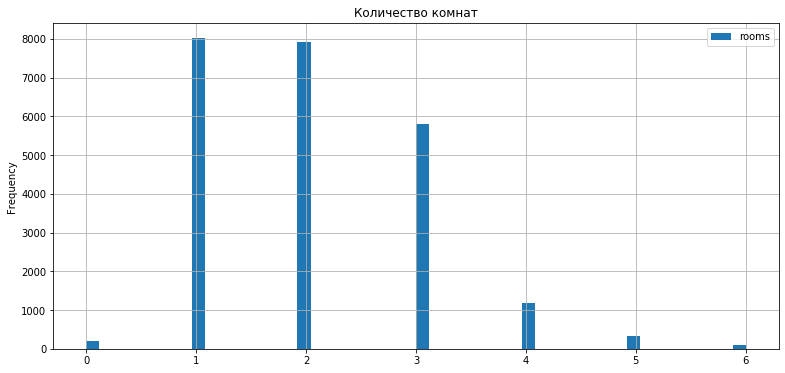

In [ ]:
describe_and_hist(df, 'rooms', 'Количество комнат')

#### Высота потолков

count    23613.000000
mean         2.728799
std          0.990246
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

10й и 90й процентли: 2.5 , 3.0


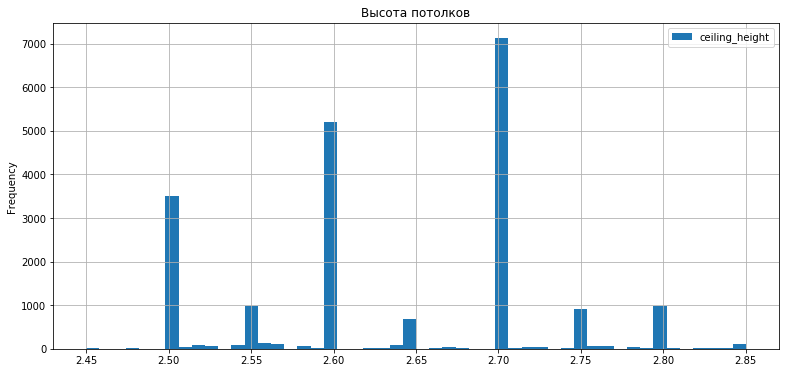

In [ ]:
describe_and_hist(df, 'ceiling_height', 'Высота потолков')

#### Вывод по подпункту:
Были рассморены основные параметры недвижимости:
* Площадь: Средняя площадь крартиры равна 60 м2. В основном квартиры имеют площадь от 33 до 93.4 м2.
* Стоимость: Средняя стоимость квартиры равна 6.5 млн. рублей. В основном квартиры стоят от 2.5 до 10.9
* Количество комнат: Среднее количество комнат в квартире равно двум. В основном в квартире от одной до трех комнат.
* Высота потолков: Средняя высота потолков в квартире равна 2.73м. В основном высота потолков от 2.5 до 3м.

### Изучите время продажи квартиры. Постройте гистограмму.

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

10й и 90й процентли: 17.0 , 460.0


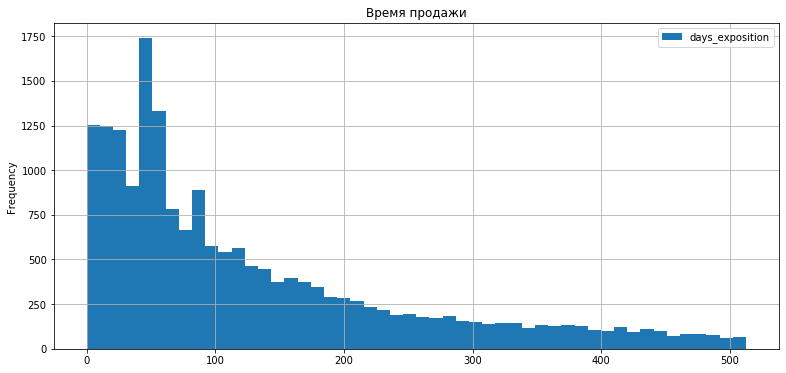

In [ ]:
describe_and_hist(df, 'days_exposition', 'Время продажи')

#### Вывод по подпункту:
Среднее время продажи квартиры равно 219 дней. Можно считать, что квартира продалась быстро, если обьявление было размещено 17 дней и меньше, и долго, если объявление было размещено дольше 460 дней.

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Убирать редкие и выбивающиеся значения будем, опираясь на межквартильный размах, также построим диаграмму размаха для каждого из параметров для наглядности.

In [ ]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,m2_price,weekday_of_publication,month_of_publication,year_of_publication,floor_type,living_ratio,kitchen_ratio
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,0.120370,3,3,2019,другой,0.472222,0.231481
1,7,3.350,40.40,2018-12-04,1,2.60,11.0,18.600000,1,False,...,0.0,-1.0,81.0,0.082921,1,12,2018,первый,0.460396,0.272277
2,10,5.196,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,2.0,574.0,558.0,0.092786,3,8,2015,другой,0.612500,0.148214
3,0,64.900,159.00,2015-07-24,3,2.70,14.0,89.441914,9,False,...,3.0,234.0,424.0,0.408176,4,7,2015,другой,0.562528,0.186967
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,0.100000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,3.0,381.0,NaN,0.072491,1,3,2017,другой,0.547792,0.103356
23695,14,3.100,59.00,2018-01-15,3,2.60,5.0,38.000000,4,False,...,0.0,-1.0,45.0,0.052542,0,1,2018,другой,0.644068,0.144068
23696,18,2.500,56.70,2018-02-11,2,2.60,3.0,29.700000,1,False,...,0.0,-1.0,NaN,0.044092,6,2,2018,первый,0.523810,0.186967
23697,13,11.475,76.75,2017-03-28,2,3.00,17.0,43.174006,12,False,...,3.0,196.0,602.0,0.149511,1,3,2017,другой,0.562528,0.303583


Для нахождения межквартильного размаха и построения диаграммы размаха, напишем функцию:

In [ ]:
def boxplot_and_IQR(data, column):
    #Вычислим границы выбросов:
    # Первая квантиль
    Q1 = data[column].quantile(0.25)
    # Третья квантиль
    Q3 = data[column].quantile(0.75)
    # Межквантильное расстояние
    IQR = Q3 - Q1
    
    min_range = Q1 - 1.5 * IQR
    max_range = Q3 + 1.5 * IQR
    
    if min_range < 0:
        min_range = 0
    
    plt.ylim(min_range, max_range)
    data.boxplot(column=column)
    plt.show()
    
    print('Нижняя граница:', min_range)
    print('Верхняя граница:', max_range)

#### Площадь:

Найдем где находятся выбросы:

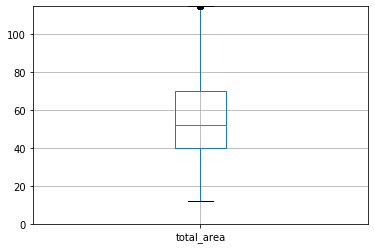

Нижняя граница: 0
Верхняя граница: 114.5


In [ ]:
boxplot_and_IQR(df, 'total_area')

Ниже 12 м2 и выше 114,5 м2 находятся выбросы.

#### Кол-во комнат:

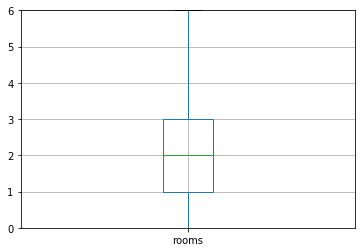

Нижняя граница: 0
Верхняя граница: 6.0


In [ ]:
boxplot_and_IQR(df, 'rooms')

Значения, которые больше 6, это выбросы.

#### Высота потолков:

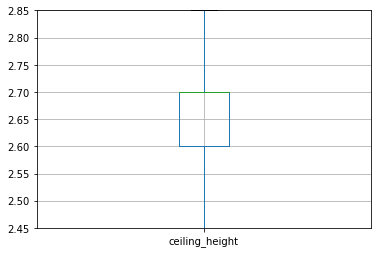

Нижняя граница: 2.45
Верхняя граница: 2.8500000000000005


In [ ]:
boxplot_and_IQR(df, 'ceiling_height')

Ниже 2,45м и выше 2,85м находятся выбросы.

#### Стоимость:

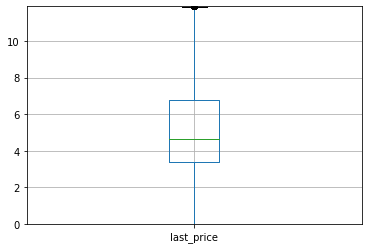

Нижняя граница: 0
Верхняя граница: 11.8975


In [ ]:
boxplot_and_IQR(df, 'last_price')

Выше 11.9 млн.р. находятся выбросы.

#### Стоимость м2:

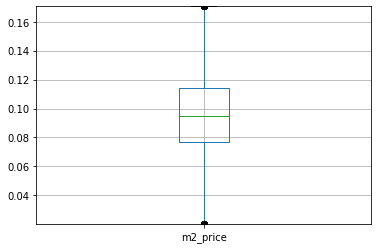

Нижняя граница: 0.020097057799442916
Верхняя граница: 0.17067157033426184


In [ ]:
boxplot_and_IQR(df, 'm2_price')

Ниже 0.02 млн.р. и выше 0.17 млн.р. находятся выбросы.

####  Cколько дней было размещено объявление:

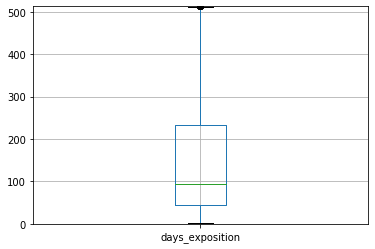

Нижняя граница: 0
Верхняя граница: 512.5


In [ ]:
boxplot_and_IQR(df, 'days_exposition')

Выше 512.5 дней находятся выбросы.

#### Год размещения публикации:

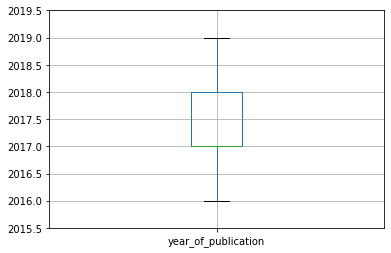

Нижняя граница: 2015.5
Верхняя граница: 2019.5


In [ ]:
boxplot_and_IQR(df, 'year_of_publication')

Ниже 2016 года находятся выбросы.

Автоматизируем построение графиков через цикл, тем самым оптимизируем код и делаем работу презентабельнее.

In [ ]:
parameters = ['total_area', 'rooms', 'ceiling_height', 'last_price', 'm2_price', 'days_exposition', 'year_of_publication']

Диаграмма размаха для параметра - total_area


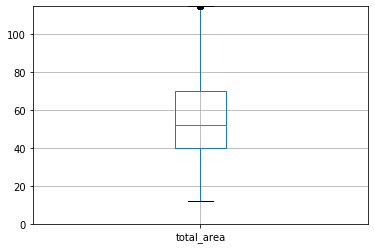

Нижняя граница: 0
Верхняя граница: 114.5
--------------------------------------------

Диаграмма размаха для параметра - rooms


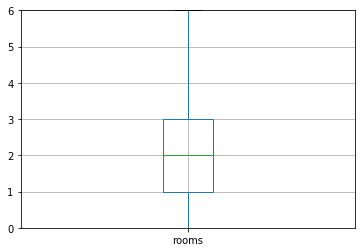

Нижняя граница: 0
Верхняя граница: 6.0
--------------------------------------------

Диаграмма размаха для параметра - ceiling_height


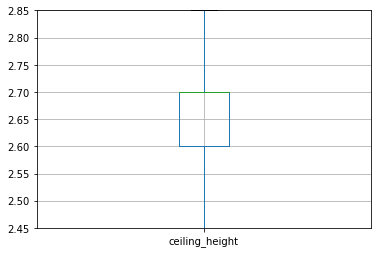

Нижняя граница: 2.45
Верхняя граница: 2.8500000000000005
--------------------------------------------

Диаграмма размаха для параметра - last_price


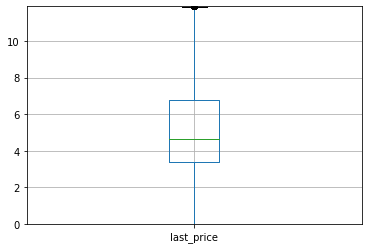

Нижняя граница: 0
Верхняя граница: 11.8975
--------------------------------------------

Диаграмма размаха для параметра - m2_price


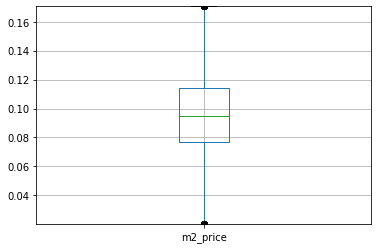

Нижняя граница: 0.020097057799442916
Верхняя граница: 0.17067157033426184
--------------------------------------------

Диаграмма размаха для параметра - days_exposition


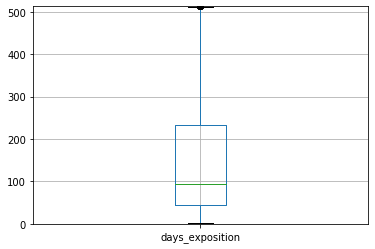

Нижняя граница: 0
Верхняя граница: 512.5
--------------------------------------------

Диаграмма размаха для параметра - year_of_publication


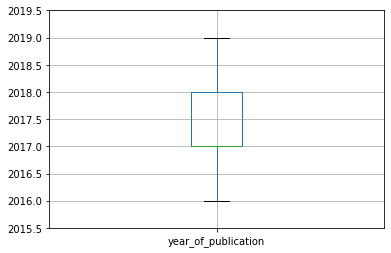

Нижняя граница: 2015.5
Верхняя граница: 2019.5
--------------------------------------------



In [ ]:
for parameter in parameters:
    print('Диаграмма размаха для параметра -', parameter)
    boxplot_and_IQR(df, parameter)
    print('--------------------------------------------')
    print()

#### Отфильтруем базу по полученным значениям:

In [ ]:
good_df = df.query('(12 <= total_area <= 114.5) and rooms <= 6 and (2.45 <= ceiling_height <= 2.85) and last_price <= 11.9 and (0.02 < m2_price < 0.17) and days_exposition < 512.5 and year_of_publication >= 2016')

In [ ]:
df.loc[
    ((df['total_area'] <= 114.5) & (df['total_area'] >= 12)) &
    (df['rooms'] <= 6)
]

In [ ]:
print('Кол-во строк в датафрейме до удаления редких и выбивающихся значений:', df.shape[0])
print('Кол-во строк в датафрейме после удаления редких и выбивающихся значений:', good_df.shape[0])

Кол-во строк в датафрейме до удаления редких и выбивающихся значений: 23613
Кол-во строк в датафрейме после удаления редких и выбивающихся значений: 15404


#### Вывод по подпункту:
Были убраны выбивающиеся значения из датафрейма на основе межквартильного размаха.

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Создадим функцию, которая строит график зависимости стоимости квартиры от выбранного столбца:

In [ ]:
def price_dependence(df, column, style, alpha, title):
    (df
     .pivot_table(index=column, values='last_price', aggfunc='median')
     .plot(style=style, title=title, figsize=(13,6), alpha=alpha, grid=True)
    )
    plt.show()

#### Зависимость стоимости квартиры от общей площади:

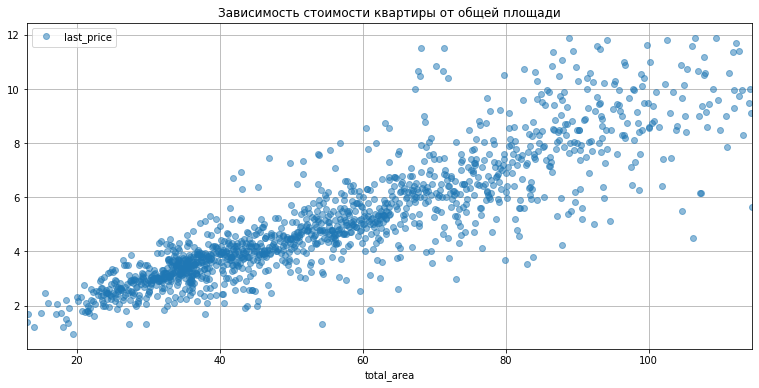

Коэффициент корреляции Пирсона: 0.6535810573773595


In [ ]:
price_dependence(good_df, 'total_area', 'o', 0.5, 'Зависимость стоимости квартиры от общей площади')
print('Коэффициент корреляции Пирсона:', df['last_price'].corr(df['total_area']))

#### Зависимость стоимости квартиры от количества комнат:

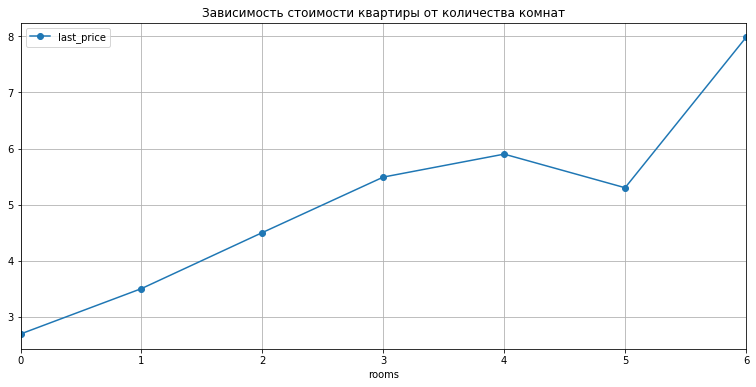

Коэффициент корреляции Пирсона: 0.3631242150919466


In [ ]:
price_dependence(good_df, 'rooms', 'o-', 1, 'Зависимость стоимости квартиры от количества комнат')
print('Коэффициент корреляции Пирсона:', df['last_price'].corr(df['rooms']))

#### Зависимость стоимости квартиры от удаленности от центра:

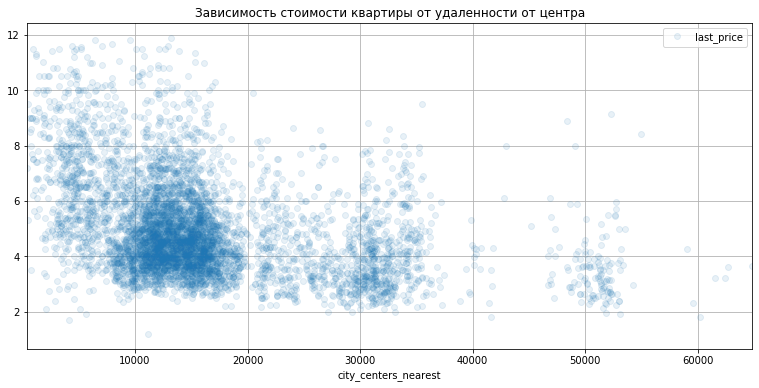

Коэффициент корреляции Пирсона: -0.20621265850318488


In [ ]:
price_dependence(good_df, 'city_сenters_nearest', 'o', 0.1, 'Зависимость стоимости квартиры от удаленности от центра')
print('Коэффициент корреляции Пирсона:', df['last_price'].corr(df['city_сenters_nearest']))

#### Зависимость стоимости квартиры от типа этажа:

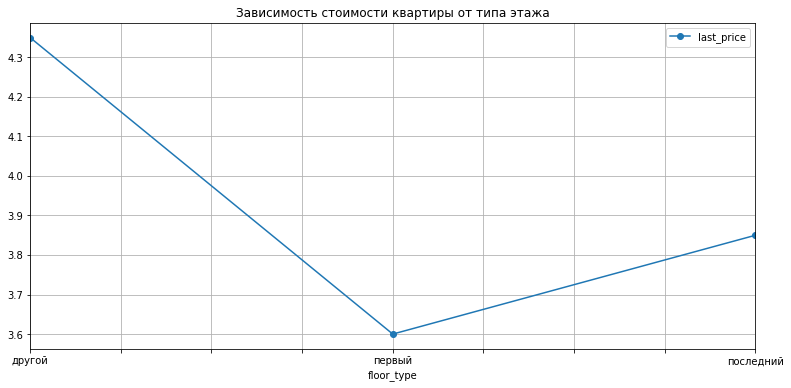

Коэффициент корреляции Пирсона вычислить невозможно


In [ ]:
price_dependence(good_df, 'floor_type', 'o-', 1, 'Зависимость стоимости квартиры от типа этажа')
print('Коэффициент корреляции Пирсона вычислить невозможно')

#### Зависимость стоимости квартиры от дня недели публикации:

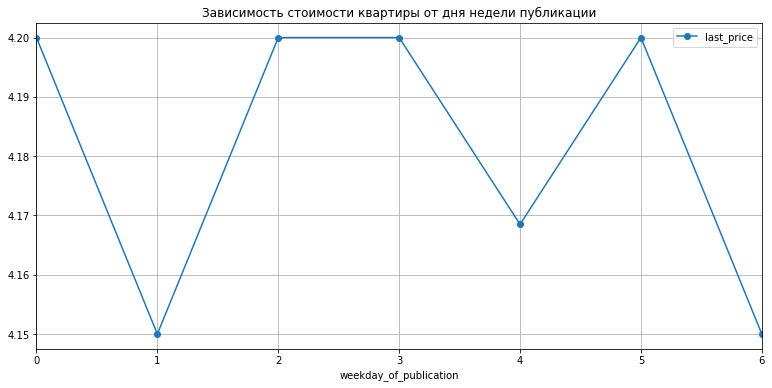

Коэффициент корреляции Пирсона: 0.0012946691294495958


In [ ]:
price_dependence(good_df, 'weekday_of_publication', 'o-', 1, 'Зависимость стоимости квартиры от дня недели публикации')
print('Коэффициент корреляции Пирсона:', df['last_price'].corr(df['weekday_of_publication']))

#### Зависимость стоимости квартиры от месяца публикации:

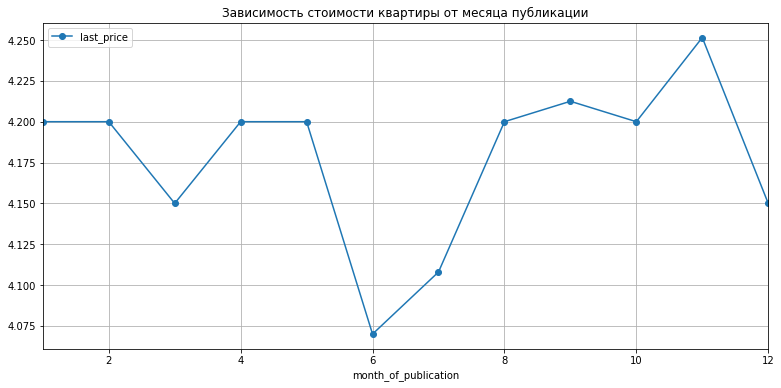

Коэффициент корреляции Пирсона: 0.002765263118238019


In [ ]:
price_dependence(good_df, 'month_of_publication', 'o-', 1, 'Зависимость стоимости квартиры от месяца публикации')
print('Коэффициент корреляции Пирсона:', df['last_price'].corr(df['month_of_publication']))

#### Зависимость стоимости квартиры от года публикации:

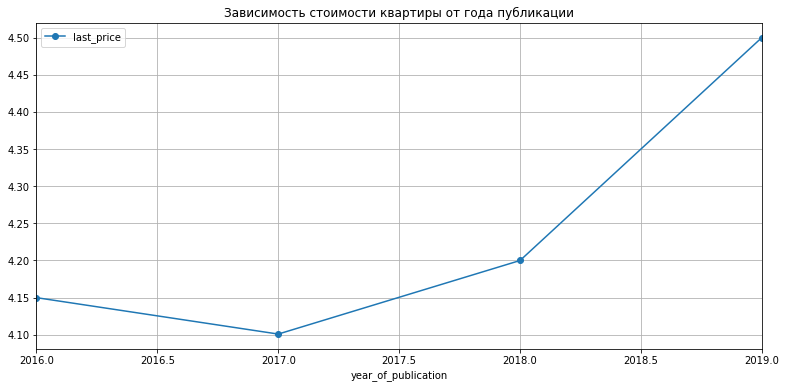

Коэффициент корреляции Пирсона: -0.04302312317753814


In [ ]:
price_dependence(good_df, 'year_of_publication', 'o-', 1, 'Зависимость стоимости квартиры от года публикации')
print('Коэффициент корреляции Пирсона:', df['last_price'].corr(df['year_of_publication']))

#### Вывод по подпункту:
*Какие факторы больше всего влияют на стоимость квартиры?*  
На стоимость квартиры больше всего влияют: общая площадь и кол-во комнат. Также влияют на цену удаленность от центра города (квартиры, которые удалены от центра меньше, чем на 20км стоят больше) и этаж (квартиры не на первом и последнем этажах в среднем стоят больше). День недели и месяц размещения обьявления не играют особой роли в конечной стоимости квартиры, чего нельзя сказать о годе размещения обьявления, чем позже было размещено обьявление, тем выше стоимость квартиры.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

#### Необходимые расчеты:

In [ ]:
top_10_count_of_flats_df = good_df.groupby('locality_name')['m2_price'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
top_10_count_of_flats_df.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,9652,0.102948
Пушкин,226,0.098880
деревня Кудрово,258,0.092720
посёлок Парголово,282,0.089222
посёлок Мурино,477,0.085949
посёлок Шушары,375,0.077787
Колпино,269,0.074831
Гатчина,217,0.068451
Всеволожск,288,0.066753


#### Вывод по подпункту:
Лидерами по стоимости м2 являются Санкт-Петербург и Пушкин, замыкаю десятку Всеволожск и Выборг.

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

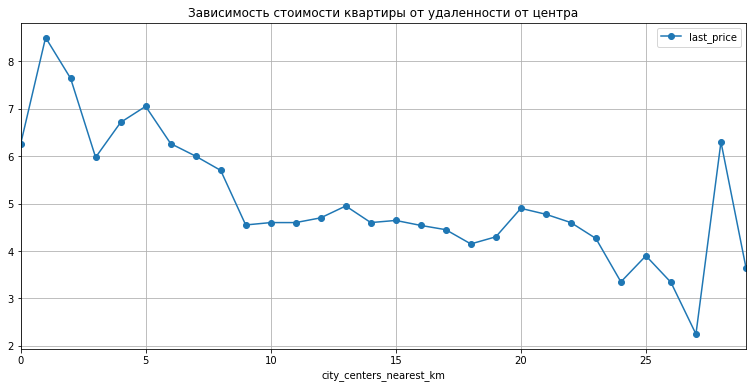

In [ ]:
#center_of_spb_df = good_df[good_df['locality_name'] == 'Санкт-Петербург']
center_of_spb_df= good_df.query('locality_name == "Санкт-Петербург"')
center_of_spb_df['city_centers_nearest_km'] = round(center_of_spb_df['city_сenters_nearest'] / 1000)
price_dependence(center_of_spb_df, 'city_centers_nearest_km', 'o-', 1, 'Зависимость стоимости квартиры от удаленности от центра')

#### Вывод по подпункту:
Исходя из графика видно, что 9 км является границей центра города. 

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

#### Изучите следующие параметры: площадь, цена, число комнат, высота потолков

Представим значение расстояния до центра в км и округлим до трех знаков после запятой.

In [ ]:
good_df['city_сenters_nearest'] = round(good_df['city_сenters_nearest'] / 1000, 3)

In [ ]:
good_df['city_сenters_nearest']

1        18.603
5           NaN
6        19.143
8           NaN
9        15.008
          ...  
23687    16.704
23690     6.263
23692       NaN
23693    34.104
23695       NaN
Name: city_сenters_nearest, Length: 15404, dtype: float64

In [ ]:
good_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,m2_price,weekday_of_publication,month_of_publication,year_of_publication,living_ratio,kitchen_ratio
count,15404.000000,15404.000000,15404.000000,15404.000000,15404.000000,15404.000000,15404.000000,15404.000000,15404.000000,15404.000000,...,15404.000000,15404.000000,15404.000000,15404.000000,15404.000000,15404.00000,15404.000000,15404.000000,15404.000000,15404.000000
mean,9.567580,4.553343,50.682319,1.837575,2.633039,11.434887,28.744687,6.221825,9.324333,0.617242,...,139.357505,0.481433,185.452480,117.387432,0.090665,2.60322,6.536679,2017.421384,0.560021,0.192512
std,5.514864,1.962030,16.668992,0.860511,0.087249,6.711323,11.681869,5.050849,3.531126,0.940731,...,283.255184,0.775095,304.616553,113.020035,0.026301,1.79080,3.482385,0.767355,0.098822,0.066104
min,0.000000,0.630000,13.000000,0.000000,2.450000,1.000000,2.000000,1.000000,2.000000,0.000000,...,-1.000000,0.000000,-1.000000,1.000000,0.020064,0.00000,1.000000,2016.000000,0.069588,0.043524
25%,6.000000,3.250000,37.835000,1.000000,2.600000,5.000000,18.000000,2.000000,6.900000,0.000000,...,-1.000000,0.000000,-1.000000,38.000000,0.074705,1.00000,3.000000,2017.000000,0.500000,0.144231
50%,9.000000,4.200000,46.400000,2.000000,2.600000,9.000000,28.000000,5.000000,8.700000,0.000000,...,-1.000000,0.000000,-1.000000,75.000000,0.091594,3.00000,7.000000,2017.000000,0.562528,0.186967
75%,13.000000,5.500000,60.500000,2.000000,2.700000,16.000000,36.001777,9.000000,11.000000,1.000000,...,178.250000,1.000000,351.000000,164.000000,0.107008,4.00000,10.000000,2018.000000,0.624749,0.230966
max,50.000000,11.900000,114.500000,6.000000,2.850000,52.000000,88.000000,33.000000,50.000000,5.000000,...,2984.000000,3.000000,1344.000000,511.000000,0.169960,6.00000,12.000000,2019.000000,1.000000,0.787879


In [ ]:
center_of_spb_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around_3000,ponds_nearest,days_exposition,m2_price,weekday_of_publication,month_of_publication,year_of_publication,living_ratio,kitchen_ratio,city_centers_nearest_km
count,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,...,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9652.000000,9639.000000
mean,9.863034,5.260305,51.715135,1.873705,2.651926,12.297037,29.409224,6.602569,9.441470,0.622358,...,0.632615,254.838583,113.671467,0.102948,2.603916,6.558330,2017.417841,0.561614,0.190978,12.977280
std,5.528245,1.892397,17.093728,0.873459,0.090317,6.352145,11.938065,5.009673,3.593624,0.947295,...,0.807003,334.038490,111.568538,0.020003,1.778735,3.444908,0.780676,0.098498,0.065322,4.078194
min,0.000000,1.190000,13.000000,0.000000,2.450000,1.000000,3.000000,1.000000,2.000000,0.000000,...,0.000000,-1.000000,1.000000,0.024440,0.000000,1.000000,2016.000000,0.069588,0.043524,0.000000
25%,6.000000,3.900000,38.900000,1.000000,2.570000,9.000000,18.300000,3.000000,7.000000,0.000000,...,0.000000,-1.000000,33.000000,0.088710,1.000000,3.000000,2017.000000,0.500000,0.142857,11.000000
50%,9.000000,4.778000,47.250000,2.000000,2.700000,10.000000,28.400000,5.000000,8.700000,0.000000,...,0.000000,-1.000000,72.000000,0.100471,3.000000,7.000000,2017.000000,0.562528,0.186967,13.000000
75%,14.000000,6.200000,62.000000,3.000000,2.700000,16.000000,37.425000,9.000000,11.000000,1.000000,...,1.000000,509.000000,157.000000,0.114792,4.000000,10.000000,2018.000000,0.627365,0.229213,15.000000
max,50.000000,11.900000,114.300000,6.000000,2.850000,52.000000,88.000000,33.000000,41.100000,5.000000,...,3.000000,1337.000000,511.000000,0.169960,6.000000,12.000000,2019.000000,1.000000,0.787879,29.000000


Для дальнейшего сравнения показателей в центре СПб и в остальном городе, создадим новый столбец с категоризацией данных:  
Для этого создадим новую функцию *is_spb*:

In [ ]:
def is_spb(row):
    name_of_city = row['locality_name']
    nearest = row['city_сenters_nearest']
    
    if name_of_city == 'Санкт-Петербург' and nearest > 9:
        return 'остальные районы СПБ'
    elif name_of_city == 'Санкт-Петербург' and nearest <= 9:
        return 'центр СПБ'
    else:
        return 'Лениградская обл.'
        
good_df['is_spb'] = good_df.apply(is_spb, axis=1)   

In [ ]:
good_df.groupby('is_spb')['total_area'].agg(['count', 'mean', 'median'])

,count,mean,median
is_spb,,,
Лениградская обл.,5765,48.952232,45.0
остальные районы СПБ,8271,50.587698,46.1
центр СПБ,1368,58.545300,56.4


In [ ]:
good_df.groupby('is_spb')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
is_spb,,,
Лениградская обл.,5765,3.371446,3.15
остальные районы СПБ,8271,5.046590,4.60
центр СПБ,1368,6.551871,6.30


In [ ]:
good_df.groupby('is_spb')['rooms'].agg(['count', 'mean', 'median'])

,count,mean,median
is_spb,,,
Лениградская обл.,5765,1.777103,2
остальные районы СПБ,8271,1.844275,2
центр СПБ,1368,2.051901,2


In [ ]:
good_df.groupby('is_spb')['ceiling_height'].agg(['count', 'mean', 'median'])

,count,mean,median
is_spb,,,
Лениградская обл.,5765,2.601554,2.6
остальные районы СПБ,8271,2.647210,2.7
центр СПБ,1368,2.680044,2.7


In [ ]:
good_df.groupby('is_spb')['m2_price'].agg(['count', 'mean', 'median'])

,count,mean,median
is_spb,,,
Лениградская обл.,5765,0.070140,0.070010
остальные районы СПБ,8271,0.101075,0.099450
центр СПБ,1368,0.114222,0.111256


In [ ]:
good_df.groupby('is_spb')['days_exposition'].agg(['count', 'mean', 'median'])

,count,mean,median
is_spb,,,
Лениградская обл.,5765,123.474068,80.0
остальные районы СПБ,8271,112.475396,71.0
центр СПБ,1368,121.435673,81.0


#### Факторы, которые влияют на стоимость квартиры

In [ ]:
good_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'm2_price',
       'weekday_of_publication', 'month_of_publication', 'year_of_publication',
       'floor_type', 'living_ratio', 'kitchen_ratio', 'is_spb'],
      dtype='object')

In [ ]:
center_of_spb_df = good_df[good_df['is_spb'] == 'центр СПБ']
spb_df = good_df[good_df['locality_name'] == 'Санкт-Петербург']

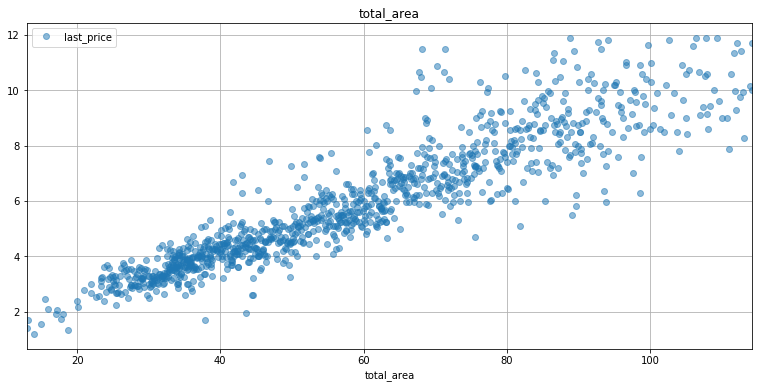

Коэффициент корреляции Пирсона: 0.8167114585448731


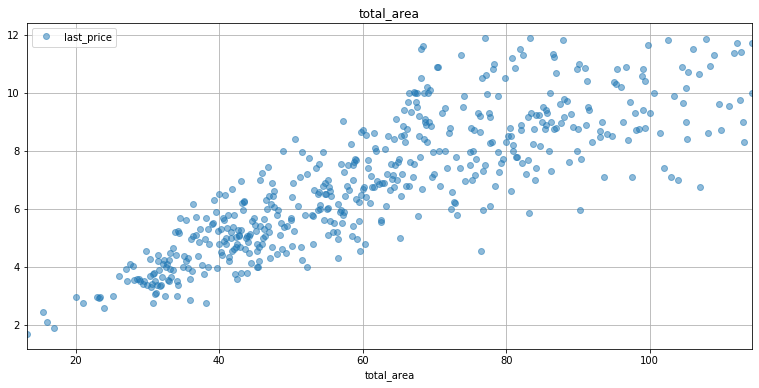

Коэффициент корреляции Пирсона: 0.7911334798754437


In [ ]:
price_dependence(spb_df, 'total_area', 'o', 0.5, 'total_area')
print('Коэффициент корреляции Пирсона:', spb_df['last_price'].corr(spb_df['total_area']))
price_dependence(center_of_spb_df, 'total_area', 'o', 0.5, 'total_area')
print('Коэффициент корреляции Пирсона:', center_of_spb_df['last_price'].corr(center_of_spb_df['total_area']))

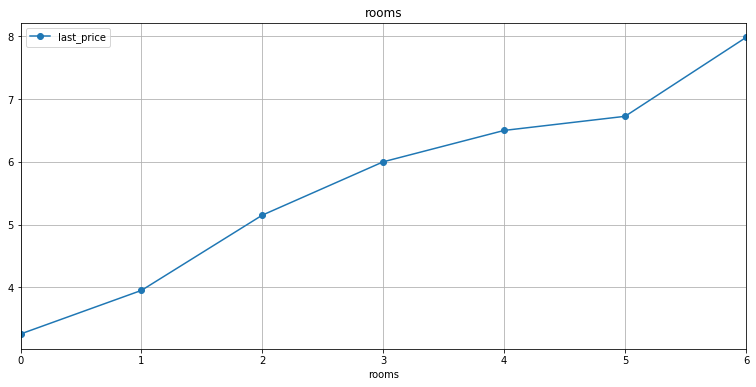

Коэффициент корреляции Пирсона: 0.5072206951051007


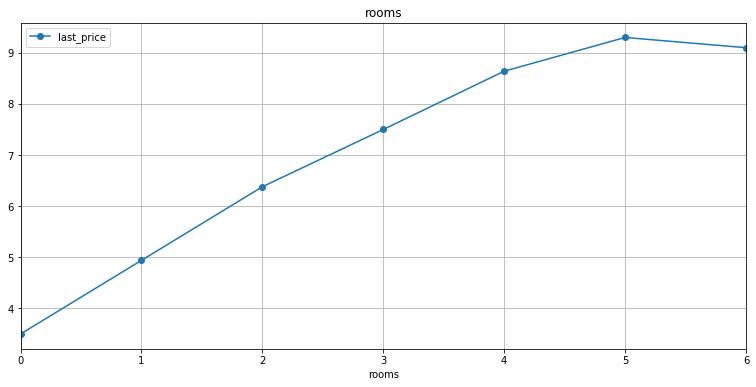

Коэффициент корреляции Пирсона: 0.4970614835409712


In [ ]:
price_dependence(spb_df, 'rooms', 'o-', 1, 'rooms')
print('Коэффициент корреляции Пирсона:', spb_df['last_price'].corr(spb_df['rooms']))
price_dependence(center_of_spb_df, 'rooms', 'o-', 1, 'rooms')
print('Коэффициент корреляции Пирсона:', center_of_spb_df['last_price'].corr(center_of_spb_df['rooms']))

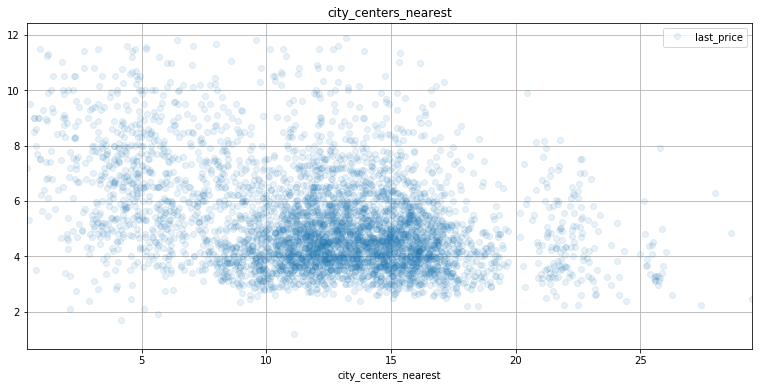

Коэффициент корреляции Пирсона: -0.2661167856687889


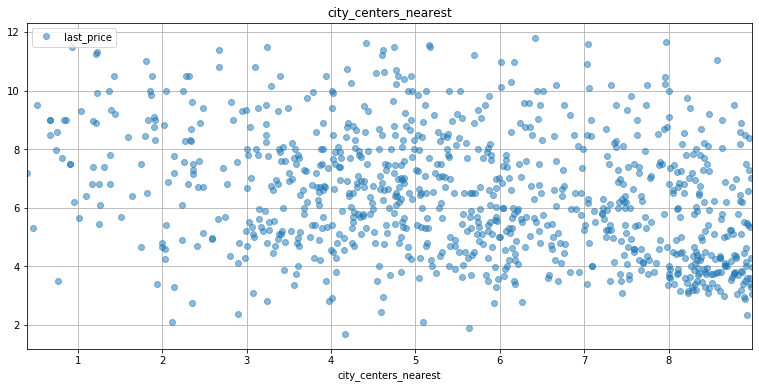

Коэффициент корреляции Пирсона: -0.25085157368099936


In [ ]:
price_dependence(spb_df, 'city_сenters_nearest', 'o', 0.1, 'city_сenters_nearest')
print('Коэффициент корреляции Пирсона:', spb_df['last_price'].corr(spb_df['city_сenters_nearest']))
price_dependence(center_of_spb_df, 'city_сenters_nearest', 'o', 0.5, 'city_сenters_nearest')
print('Коэффициент корреляции Пирсона:', center_of_spb_df['last_price'].corr(center_of_spb_df['city_сenters_nearest']))

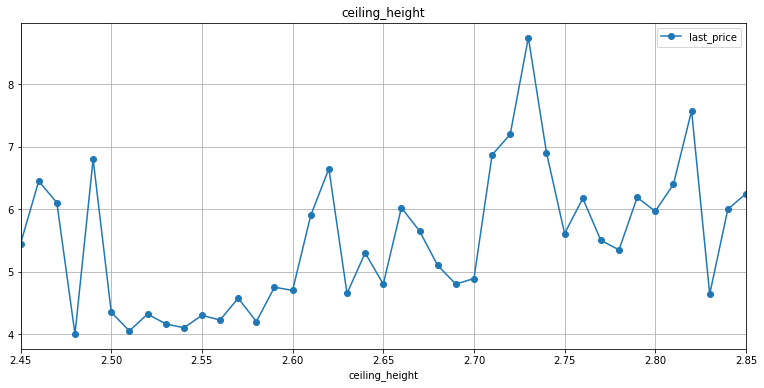

Коэффициент корреляции Пирсона: 0.2575954875788456


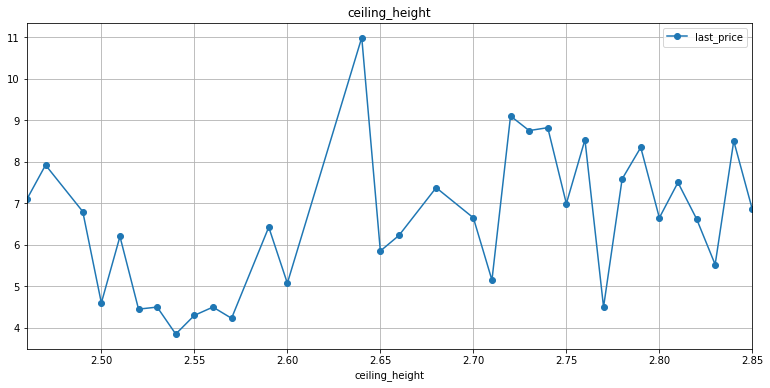

Коэффициент корреляции Пирсона: 0.27832018244989337


In [ ]:
price_dependence(spb_df, 'ceiling_height', 'o-', 1, 'ceiling_height')
print('Коэффициент корреляции Пирсона:', spb_df['last_price'].corr(spb_df['ceiling_height']))
price_dependence(center_of_spb_df, 'ceiling_height', 'o-', 1, 'ceiling_height')
print('Коэффициент корреляции Пирсона:', center_of_spb_df['last_price'].corr(center_of_spb_df['ceiling_height']))

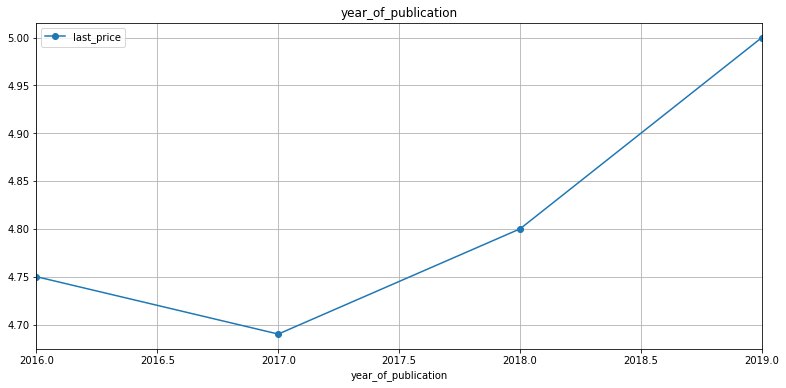

Коэффициент корреляции Пирсона: 0.025237370885797986


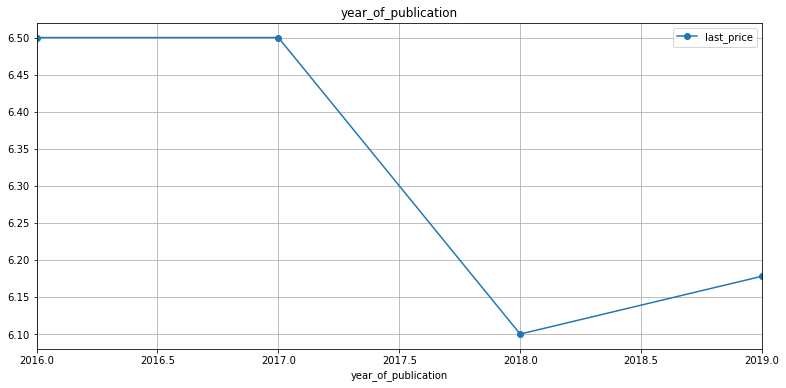

Коэффициент корреляции Пирсона: -0.04489631930446644


In [ ]:
price_dependence(spb_df, 'year_of_publication', 'o-', 1, 'year_of_publication')
print('Коэффициент корреляции Пирсона:', spb_df['last_price'].corr(spb_df['year_of_publication']))
price_dependence(center_of_spb_df, 'year_of_publication', 'o-', 1, 'year_of_publication')
print('Коэффициент корреляции Пирсона:', center_of_spb_df['last_price'].corr(center_of_spb_df['year_of_publication']))

#### Вывод по подпункту:
* Все параметры квартир в центре СПБ (общая площадь, стоимость, количество комнат, высота потолков, цена за м2 и кол-ву дней, которое провисело обьявление) превышают аналогичные параметры квартир в остальном городе.  
* Все факторы, влияющие на стоимость квартиры, не отличаются по мере взаимосвязи (это видно по схожим значениям коэффициета Пирсона), кроме года публикации обьявления, тут наблюдается странная картина: В центре СПБ в 2017 году квартиры стоили в среднем больше, чем в 2018 и 2019, хотя в остальном городе стоимость недвижимости росла.

## Общий вывод

***В ходе работы над проектом:*** 
  
    
**Были рассмотрели основные параметры недвижимости по всему датасету:**
* Средняя площадь крартиры равна 60 м2. В основном квартиры имеют площадь от 33 до 93.4 м2.
* Средняя стоимость квартиры равна 6.5 млн. рублей. В основном квартиры стоят от 2.5 до 10.9
* Среднее количество комнат в квартире равно двум. В основном в квартире от одной до трех комнат.
* Средняя высота потолков в квартире равна 2.73м. В основном высота потолков от 2.5 до 3м.
* Среднее время продажи квартиры равно 219 дней. Можно считать, что квартира продалась быстро, если обьявление было размещено 17 дней и меньше, и долго, если объявление было размещено дольше 460 дней.

**Были убраны редкие и выбивающиеся значения (8209 объявлений):**
* Квартиры площадью менее 12 или более 114.5 кв.м.
* Квартиры с количеством комнат более 6-ти.
* Квартиры с высотой потолка менее 2.45 или более 2.85 м.
* Квартиры стоимостью выше 11.9 млн рублей.
* Квартиры с ценой квадратного метра менее 0.02 млн.р. или более 0.17 млн.р.
* Обьявления, провисевшие более 512 дней
* Обьявления, размещённые ранее 2016 года.

**Было исследовано влияние различных факторов на стоимость квартиры:**  
* На стоимость квартиры больше всего влияют: общая площадь и кол-во комнат. 
* Также влияют на цену удаленность от центра города (квартиры, которые удалены от центра меньше, чем на 20км стоят больше) и этаж (квартиры не на первом и последнем этажах в среднем стоят больше).
* День недели и месяц размещения обьявления не играют особой роли в конечной стоимости квартиры, чего нельзя сказать о годе размещения обьявления, чем позже было размещено обьявление, тем выше стоимость квартиры.

**Была исследована стоимость м2 в 10 населённых пунктах с наибольшим числом объявлений:**  
* Cамое дорогое жильё cреди 10 населённых пунктов с наибольшим числом объявлений находится в Санкт-Петербурге и Пушкине. Замыкают десятку Всеволжск и Выборг.

**Была установлена граница центральной области Санкт-Петербурга:**
* На графике зависимости стоимости квартиры от удаленности от центра заметно, график меняется, начиная с отметки в 9км. Что позволяет сделать вывод о том, что центральная зона для Санкт-Петербурга ограничена радиусом в 9 км.

**Был выделен сегмент квартир в центре, изучены параметры, было проведено сравнение этих параметров с параметрами недвижимости во всем городе:**
* Все параметры квартир в центре СПБ (общая площадь, стоимость, количество комнат, высота потолков, цена за м2 и кол-ву дней, которое провисело обьявление) превышают аналогичные параметры квартир в остальном городе.  
* Все факторы, влияющие на стоимость квартиры, не отличаются по мере взаимосвязи (это видно по схожим значениям коэффициета Пирсона), кроме года публикации обьявления, тут наблюдается странная картина: В центре СПБ в 2017 году квартиры стоили в среднем больше, чем в 2018 и 2019, хотя в остальном городе стоимость недвижимости росла.

**Ниже приведена матрица корреляции для отфильтрованной таблицы в виде тепловой карты:**

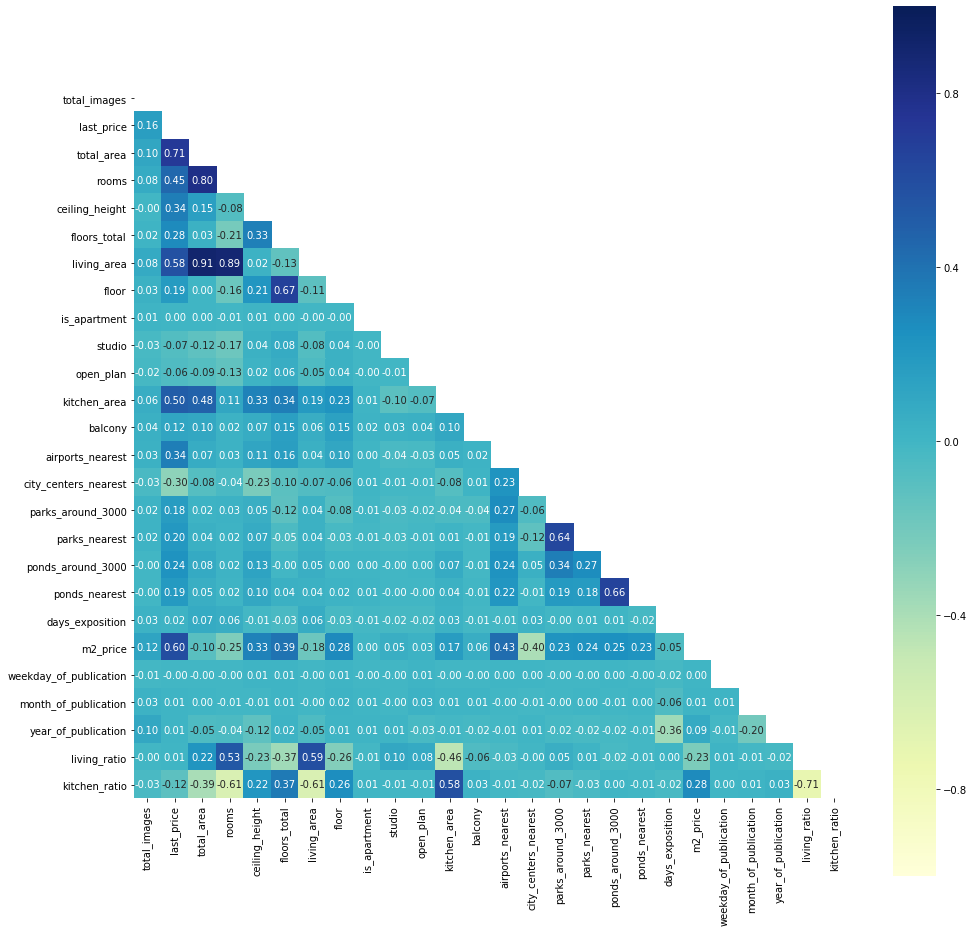

In [ ]:
plt.figure(figsize=(16,16))
matrix = np.triu(good_df.corr())
sns.heatmap(good_df.corr(), annot=True, fmt='.2f', cmap="YlGnBu", square=True, vmin=-1, vmax=1, center= 0, mask=matrix)
plt.show()

Из тепловой карты видно, что наибольшее влияние на стоимость квартиры оказывает ее площадь и кол-во комнат, чуть меньше влияют высота потолков и удаленность от аэропорта. Удаленность от центра также оказывает влияние - чем дальше от центра, тем ниже цена.